In [2]:
import sklearn
import sklearn.tree
#import sklearn.linear_model.LogisticRegression
from sklearn import svm
import sklearn.datasets
import sklearn.preprocessing
import sklearn.decomposition
#import sklearn.ensemble

import urllib
import bs4
import itertools

import pandas as pd
import pandas.plotting 

import numpy as np

from os import system

import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

In [57]:
df = pd.read_csv('/Users/hsiuilin/Desktop/Machine Learning/Project/Data/Use/adults.csv')
df.shape

(32561, 15)

In [4]:
df.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,56,Private,169133,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,<=50K
1,25,Private,191230,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Yugoslavia,<=50K
2,20,Private,175069,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,<=50K
3,35,Private,164526,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,>50K
4,40,Local-gov,183096,9th,5,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K


In [5]:
df.describe()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
df_test = pd.read_csv('/Users/hsiuilin/Desktop/Machine Learning/Project/Data/Use/test.csv')
df_test.shape

(16281, 15)

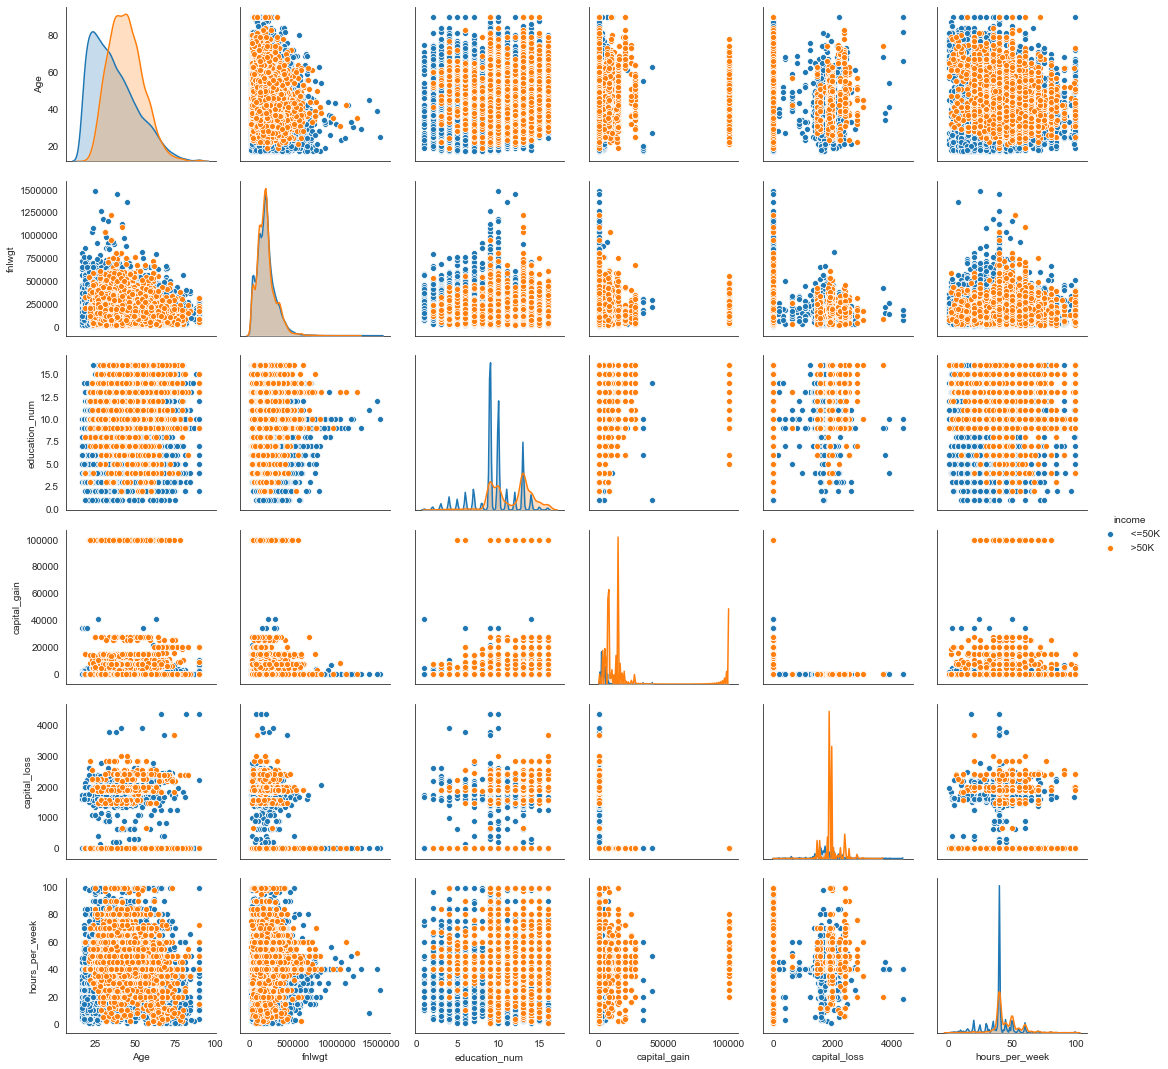

In [7]:
sns.pairplot(df, hue='income')

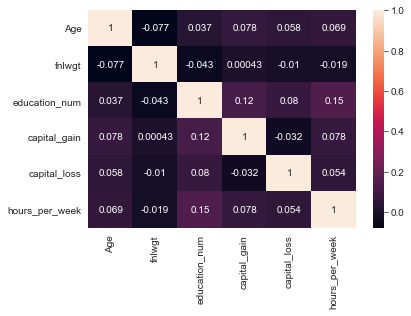

In [10]:
sns.heatmap(df.corr(), annot=True)

In [58]:
df_n = pd.get_dummies(df, columns=['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
df_n

,Age,fnlwgt,education,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,56,169133,HS-grad,9,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
1,25,191230,Some-college,10,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20,175069,Some-college,10,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35,164526,HS-grad,9,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,0,0,1
4,40,183096,9th,5,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,44,71556,Masters,14,0,0,50,>50K,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,58,181974,Doctorate,16,0,0,99,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,42,217597,HS-grad,9,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,39,107302,HS-grad,9,0,0,45,>50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_n = df_n.drop(columns=['education'])
df_n

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,56,169133,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,25,191230,10,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20,175069,10,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35,164526,9,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,40,183096,5,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,44,71556,14,0,0,50,>50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,58,181974,16,0,0,99,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,42,217597,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,39,107302,9,0,0,45,>50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_n = df_n.drop(columns=['income'])
df_n

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,56,169133,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,25,191230,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20,175069,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35,164526,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,40,183096,5,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,44,71556,14,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,58,181974,16,0,0,99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,42,217597,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,39,107302,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


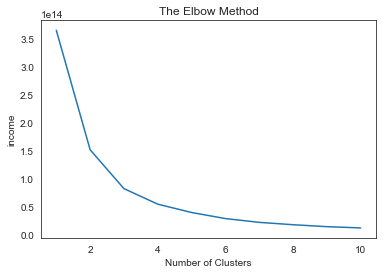

In [61]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

X = df_n
cluster = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)
plt.plot(range(1,11), cluster)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('income')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(df_n)
    preds = km.predict(df_n)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(df_n)))
    km_scores.append(-km.score(df_n))
    
    silhouette = silhouette_score(df_n,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(df_n,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
#     v_measure = v_measure_score(y,preds)
#     vmeasure_score.append(v_measure)
#     print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -151152140596881.8
Silhouette score for number of cluster(s) 2: 0.5857680110614287
Davies Bouldin score for number of cluster(s) 2: 0.6087738313923227
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -81731346971332.19
Silhouette score for number of cluster(s) 3: 0.5519185953730613
Davies Bouldin score for number of cluster(s) 3: 0.5573868936875951
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -53968542563062.945
Silhouette score for number of cluster(s) 4: 0.5564963129448972
Davies Bouldin score for number of cluster(s) 4: 0.5817471350294977
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -39073548253310.03
Silhouette score for number of cluster(s) 5: 0.5319468986094043
Davies Bouldin score for

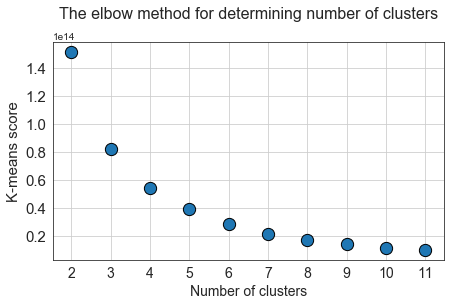

In [26]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

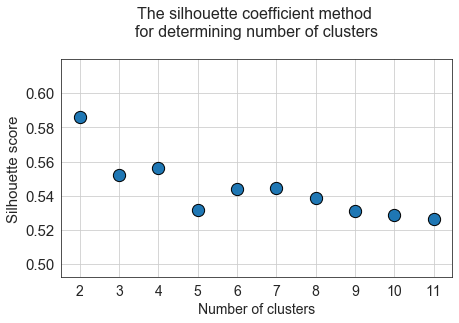

In [25]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [81]:
cluster = []

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
cluster = kmeans.fit_predict(df_n)
#cluster.append(kmeans.inertia_)

In [75]:
cluster

array([0, 0, 0, ..., 3, 1, 1], dtype=int32)

In [76]:
df['cluster'] = pd.Series(cluster)
df.to_csv(r'/Users/hsiuilin/Desktop/Machine Learning/Project/Data/Use/adult_segment_kmean5.csv',index=False)

In [82]:
library(useful)
plot.kmeans(x = cluster, data = df_n)

NameError: name 'library' is not defined

In [84]:
from kmodes.kmodes import KModes

# random categorical data
#data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11354, cost: 197461.0
Run 1, iteration: 2/100, moves: 997, cost: 197309.0
Run 1, iteration: 3/100, moves: 29, cost: 197309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8221, cost: 201594.0
Run 2, iteration: 2/100, moves: 3899, cost: 201594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9935, cost: 203522.0
Run 3, iteration: 2/100, moves: 5580, cost: 196958.0
Run 3, iteration: 3/100, moves: 2029, cost: 196378.0
Run 3, iteration: 4/100, moves: 742, cost: 196145.0
Run 3, iteration: 5/100, moves: 138, cost: 196145.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5023, cost: 209607.0
Run 4, iteration: 2/100, moves: 0, cost: 209607.0
Init: initializing centroids
Init: initializing clu

In [85]:
clusters

array([2, 0, 1, ..., 2, 2, 0], dtype=uint16)

In [86]:
df['cluster'] = pd.Series(clusters)

In [87]:
df

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cluster
0,56,Private,169133,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,<=50K,2
1,25,Private,191230,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Yugoslavia,<=50K,0
2,20,Private,175069,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,<=50K,1
3,35,Private,164526,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,>50K,2
4,40,Local-gov,183096,9th,5,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K,3
32557,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K,0
32558,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K,2
32559,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K,2


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


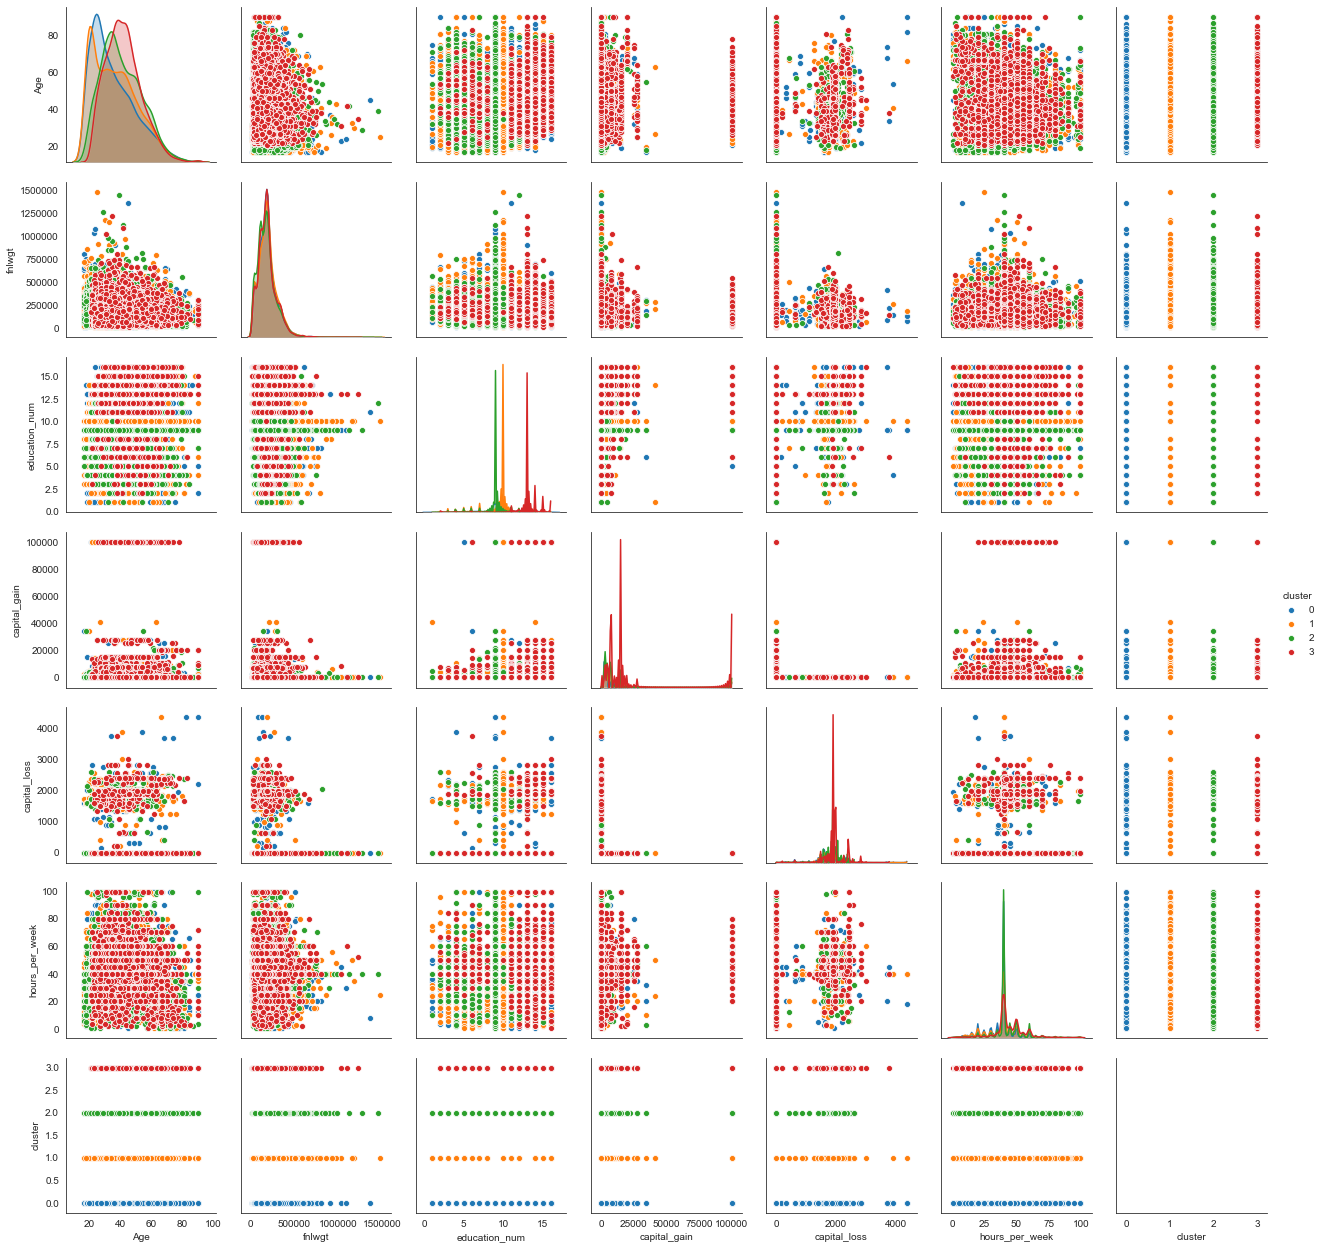

In [88]:
sns.pairplot(df, hue='cluster')

In [41]:
df.to_csv(r'/Users/hsiuilin/Desktop/Machine Learning/Project/Data/Use/adult_segment.csv',index=False)

In [77]:
from kmodes.kmodes import KModes

# random categorical data
#data = np.random.choice(20, (100, 10))
df_cluster = df.drop(['income'], axis = 1)

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df_cluster)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8604, cost: 212844.0
Run 1, iteration: 2/100, moves: 5542, cost: 209861.0
Run 1, iteration: 3/100, moves: 4261, cost: 206063.0
Run 1, iteration: 4/100, moves: 1915, cost: 206061.0
Run 1, iteration: 5/100, moves: 2, cost: 206061.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5769, cost: 213179.0
Run 2, iteration: 2/100, moves: 0, cost: 213179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5112, cost: 211258.0
Run 3, iteration: 2/100, moves: 222, cost: 211258.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5218, cost: 212904.0
Run 4, iteration: 2/100, moves: 24, cost: 212904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, m

In [79]:
from kmodes.kmodes import KModes

# random categorical data
#data = np.random.choice(20, (100, 10))
df_cluster = df.drop(['income'], axis = 1)

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df_cluster)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9287, cost: 194275.0
Run 1, iteration: 2/100, moves: 1465, cost: 194273.0
Run 1, iteration: 3/100, moves: 1, cost: 194273.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9747, cost: 180953.0
Run 2, iteration: 2/100, moves: 37, cost: 180953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7254, cost: 178935.0
Run 3, iteration: 2/100, moves: 1, cost: 178935.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14938, cost: 180758.0
Run 4, iteration: 2/100, moves: 2541, cost: 179977.0
Run 4, iteration: 3/100, moves: 78, cost: 179977.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11404, cost: 182842.0
Run 5, iteration: 2/100, 

In [80]:
df['cluster'] = pd.Series(clusters)
df.to_csv(r'/Users/hsiuilin/Desktop/Machine Learning/Project/Data/Use/adult_segment5.csv',index=False)